In [26]:
import pandas as pd
import numpy as np

chaos_data = pd.read_csv('KNN_Grand_Exchange/training_chaosx.csv')
chaos_data.head()
chaos_data.describe()


,0.5,0.017252604166666668,0.024674422968662034
count,1478.000000,1488.000000,1488.000000
mean,0.706959,0.020897,0.040866
std,0.190146,0.012748,0.013752
min,0.000000,0.003890,0.016772
25%,0.571429,0.011955,0.032113
50%,0.714286,0.017459,0.040418
75%,0.857143,0.027701,0.047486
max,1.000000,0.070285,0.082353


array([[<AxesSubplot:title={'center':'0.5'}>,
        <AxesSubplot:title={'center':'0.017252604166666668'}>],
       [<AxesSubplot:title={'center':'0.024674422968662034'}>,
        <AxesSubplot:>]], dtype=object)

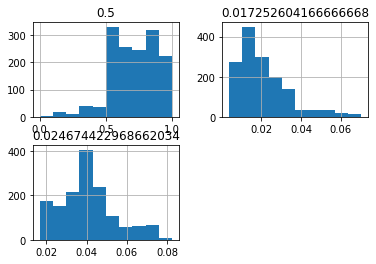

In [27]:
chaos_data.hist()

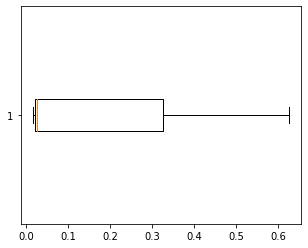

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(chaos_data.loc[2], vert=False)

plt.subplots_adjust(left=0.25)



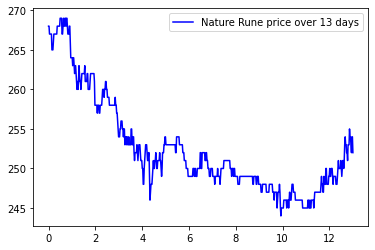

In [29]:
#dataset number 2 from March 2 2020 3:40am to April 20 9:51 pm
#train from March 4 to March 17
#test from March 18-19

import pandas as pd

first = 1583120401
march_3 = 1583193610 #March 3 00H
march_4 = 1583280001 #March 4 00H
march_17 = 1584404462 #March 17 00:21
march_18 = 1584490862 #00:21
march_19 = 1587255661 #March 19 00:21
last = 1587419461

def init_dataframe(df = None, colmn=None):
    new_df = pd.DataFrame()
    new_df['buy_average'] = df[colmn]
    new_df['timestamp'] = df['timestamp']
    new_df.replace(0,np.nan, inplace=True)
    return new_df


data_file  = 'KNN_Grand_Exchange/data/buy_average_1.csv'
buy_avgs = pd.read_csv(data_file)
nature_rune = init_dataframe(buy_avgs,'Nature_rune')

training_data = nature_rune[ (nature_rune['timestamp'] >= march_4 ) & ( nature_rune['timestamp'] <= march_17 )]

x_linsp = np.linspace(0,13,len(training_data.index))

fig, ax = plt.subplots()
ax.plot(x_linsp, training_data['buy_average'], color='blue', label='Nature Rune price over 13 days')

ax.legend()
plt.show()


<AxesSubplot:>

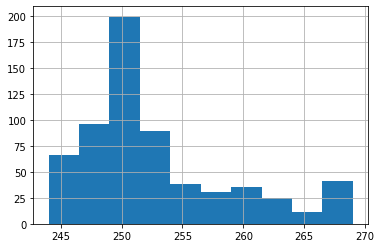

In [30]:
training_data['buy_average'].hist()

In [31]:
testing_data = nature_rune[ (nature_rune['timestamp'] >= march_18 ) & ( nature_rune['timestamp'] <= march_19 )]

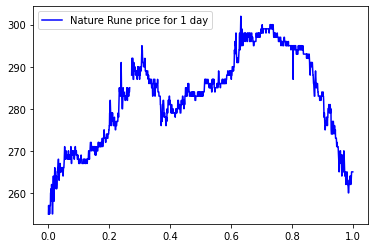

In [32]:
x_linsp = np.linspace(0,1,len(testing_data.index))

fig, ax = plt.subplots()
ax.plot(x_linsp, testing_data['buy_average'], color='blue', label='Nature Rune price for 1 day')

ax.legend()
plt.show()

In [35]:
import myKNN
import csv

def read_munchedfile(filename=None):
    
    data = []
    file = open(filename, mode='r', newline='')
    reader = csv.reader(file)

    for row in reader:
        temp = [ float(elem) for elem in row ]
        data.append(temp)

    file.close()
    return data

trainx = read_munchedfile('KNN_Grand_Exchange/Train_XX.csv')
trainy = read_munchedfile('KNN_Grand_Exchange/Train_YY.csv')

testx = read_munchedfile('KNN_Grand_Exchange/Test_XX.csv')
testy = read_munchedfile('KNN_Grand_Exchange/Test_YY.csv')

#reshape y as it is a single value in a list
for i in range(len(trainy)): trainy[i] = trainy[i][0]

for i in range(len(testy)): testy[i] = testy[i][0]
    
knn = myKNN.KNN()
k=25
pred = knn.knn_on_set([25], trainx,trainy, testx)


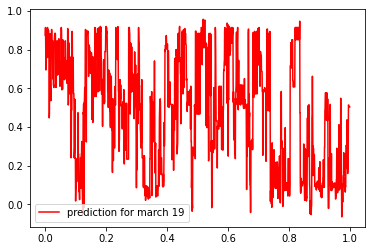

<Figure size 1152x648 with 0 Axes>

In [40]:

x_linsp = np.linspace(0,1,len(pred))
fig, ax = plt.subplots()
plt.figure(figsize=(16,9))
ax.plot(x_linsp, pred, color='red', label='prediction for march 19')

ax.legend()
plt.show()


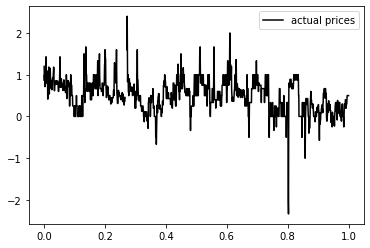

<Figure size 1152x648 with 0 Axes>

In [41]:
x_linsp = np.linspace(0,1,len(testy))
fig, ax = plt.subplots()
plt.figure(figsize=(16,9))

ax.plot(x_linsp, testy, color='black', label='actual prices')
ax.legend()
plt.show()

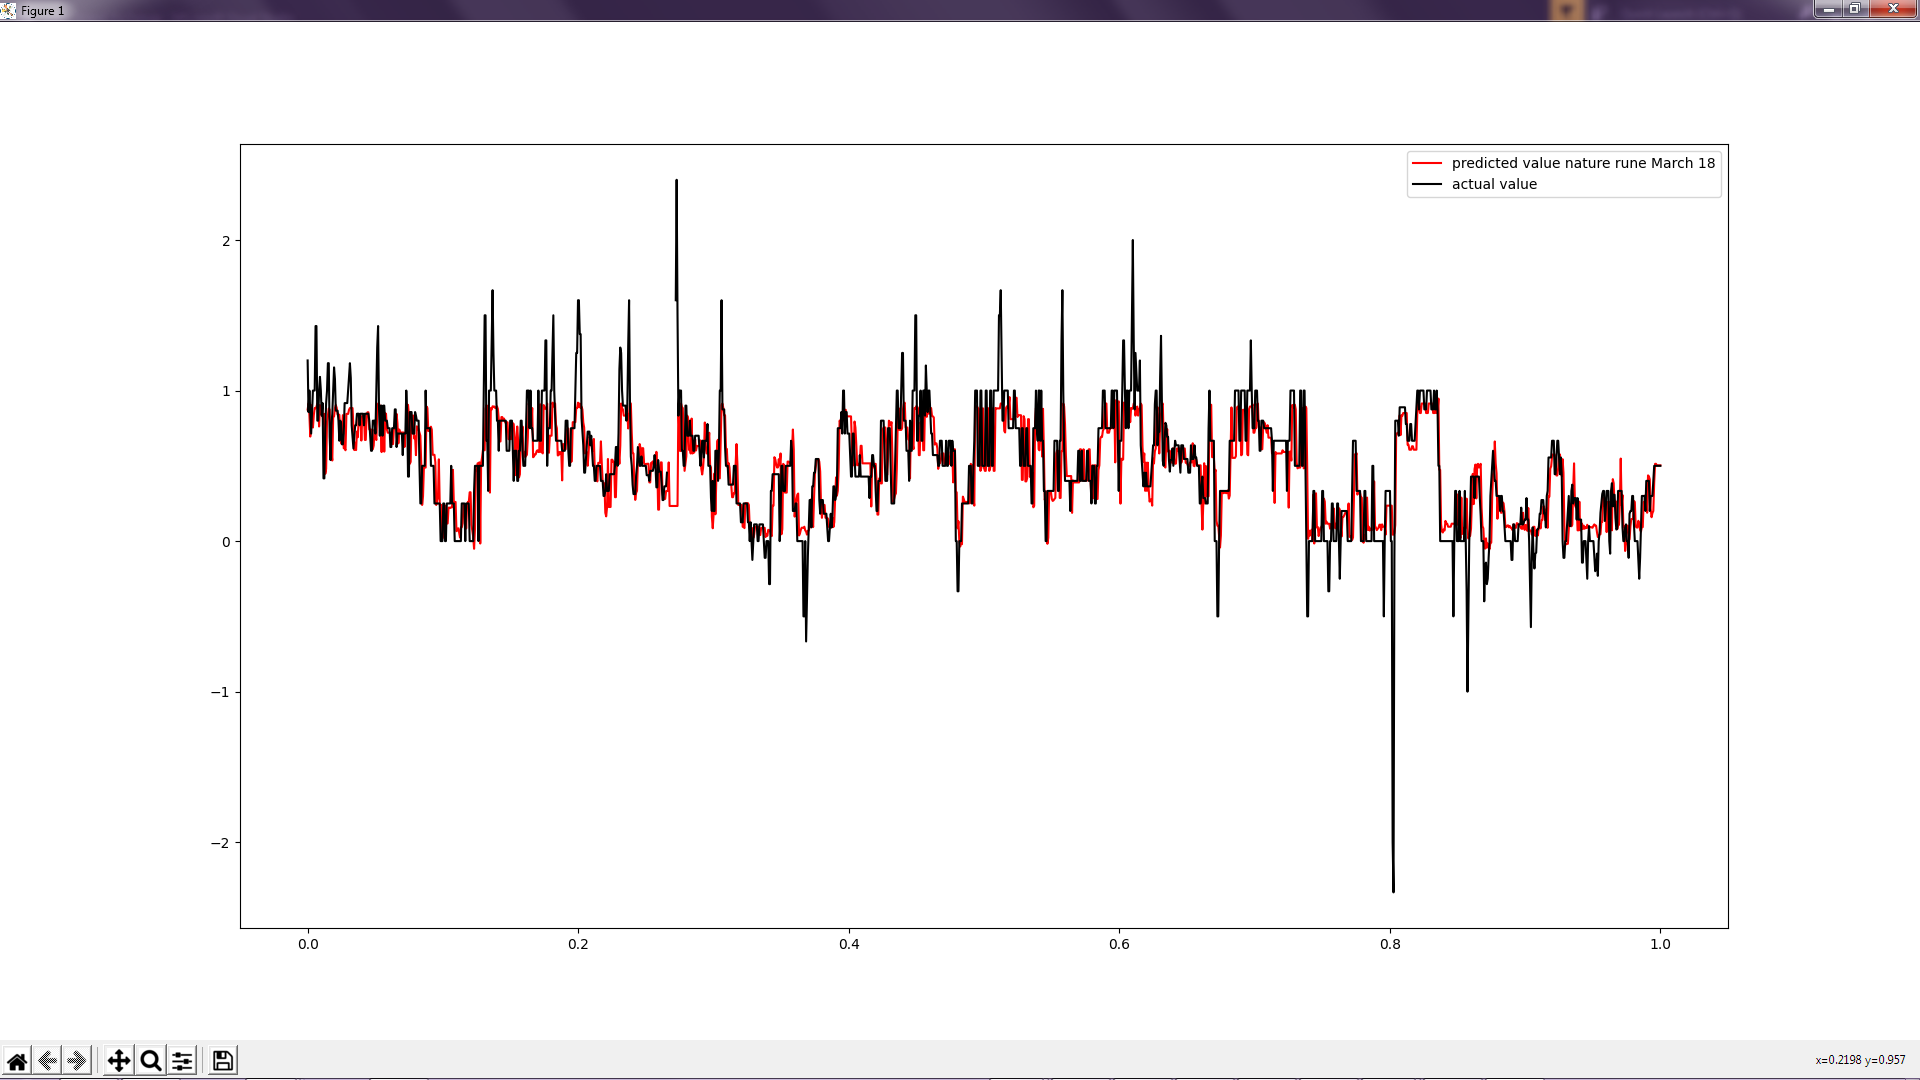

In [42]:
from IPython.display import Image
Image(filename='KNN_Nature_Rune.png') 